<a href="https://colab.research.google.com/github/boiBASH/Sterling-Bank-Data-Science-Assessment./blob/main/Exploratory_Data_Analysis_Feature_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_excel('/content/drive/MyDrive/Sterling Bank Assessment/cleaned_loan_data.xlsx')
df

,sector,PRODUCT_GROUP_NAME,LINE_DESC,FACILITY_TYPE,Contract_Amount,CURR_BAL,EQUIV_BALANCE,CONTRACT_MAT_DATE,report_date,PayinAccount_Last_LOD_Date,...,Default_status_kind,previous_loans_count,previous_loans_amount,running_loans_count,running_loans_amount,previous_loan_default_count,employment_status,age,loan_age_days,customer_tenure_days
0,AGRICULTURE,Corporate Loans Group,BILLS DUE - TERM LOANS,TERM LOAN,6.252801e+05,1.217761e+05,1.217761e+05,2020-06-24,2023-05-05,2020-02-07,...,LOST,4,1.165280e+06,0,0.00,1,EMPLOYED,33.0,2591,2101
1,AGRICULTURE,Corporate Loans Group,BILLS DUE - TERM LOANS,TERM LOAN,6.252801e+05,1.217761e+05,1.217761e+05,2020-06-24,2023-05-05,2020-02-07,...,LOST,4,1.165280e+06,0,0.00,1,EMPLOYED,33.0,2591,3516
2,AGRICULTURE,Agricultural Loans Group,BILLS DUE - AGRIC LOANS,OTHER LOAN,1.801259e+04,4.200000e+00,4.200000e+00,2017-08-26,2021-05-31,2019-06-28,...,LOST,2,3.669140e+04,0,0.00,2,Unknown,NaN,3048,3265
3,AGRICULTURE,Agricultural Loans Group,BILLS DUE - AGRIC LOANS,OTHER LOAN,5.176228e+06,1.975372e+06,1.975372e+06,2018-02-28,2021-05-31,2017-07-19,...,LOST,1,5.176228e+06,0,0.00,1,Unknown,NaN,3042,3327
4,AGRICULTURE,Agricultural Loans Group,BILLS DUE - AGRIC LOANS,OTHER LOAN,5.176228e+06,1.975372e+06,1.975372e+06,2018-02-28,2021-05-31,2017-07-19,...,LOST,1,5.176228e+06,0,0.00,1,Unknown,NaN,3042,3043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,GENERAL,Agricultural Loans Group,BILLS DUE - AGRIC LOANS,OTHER LOAN,2.452215e+06,2.452215e+06,2.452215e+06,2023-06-01,2023-06-27,2023-06-02,...,Watchlist,1,2.452215e+06,1,2786392.55,1,EMPLOYED,51.0,1349,1447
1576,GENERAL,Agricultural Loans Group,MSME AGRIC FINANCE - WOMEN,OTHER LOAN,2.786393e+06,2.786393e+06,2.786393e+06,2023-09-28,2023-08-23,2023-06-30,...,Not default,1,2.452215e+06,1,2786392.55,1,EMPLOYED,51.0,764,4096
1577,GENERAL,Agricultural Loans Group,MSME AGRIC FINANCE - WOMEN,OTHER LOAN,2.786393e+06,2.786393e+06,2.786393e+06,2023-09-28,2023-08-23,2023-06-30,...,Not default,1,2.452215e+06,1,2786392.55,1,EMPLOYED,51.0,764,1447
1578,AGRICULTURE,Current Accounts Group,STERLING SUPA AC- INDIVIDUAL,OVERDRAFT,1.000000e+07,9.745611e+06,9.745611e+06,2023-07-28,2023-08-23,2023-08-21,...,Watchlist,1,1.000000e+07,0,0.00,1,EMPLOYED,49.0,3372,3372


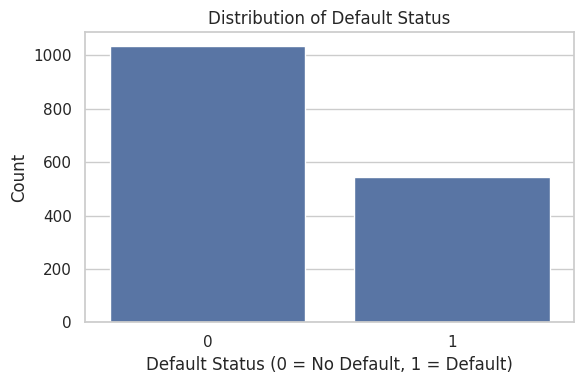

In [7]:
# Setting style for plots
sns.set(style="whitegrid")

# Plotting the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Default_status')
plt.title("Distribution of Default Status")
plt.xlabel("Default Status (0 = No Default, 1 = Default)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

###  Distribution of Default Status

The bar chart visualizes the distribution of default status among individuals:

- **0 (No Default)**: The majority class, with approximately **1,030 instances**.
- **1 (Default)**: The minority class, with around **530 instances**.

This indicates a **class imbalance**, where more people did **not default** on their payments compared to those who did. While not severely imbalanced, this skew could impact model training and might require techniques like:
- Resampling (e.g., SMOTE or undersampling),
- Class weighting,
- Evaluation metrics sensitive to imbalance (e.g., F1-score, ROC-AUC).

Understanding this distribution is crucial for building fair and effective predictive models for credit default.


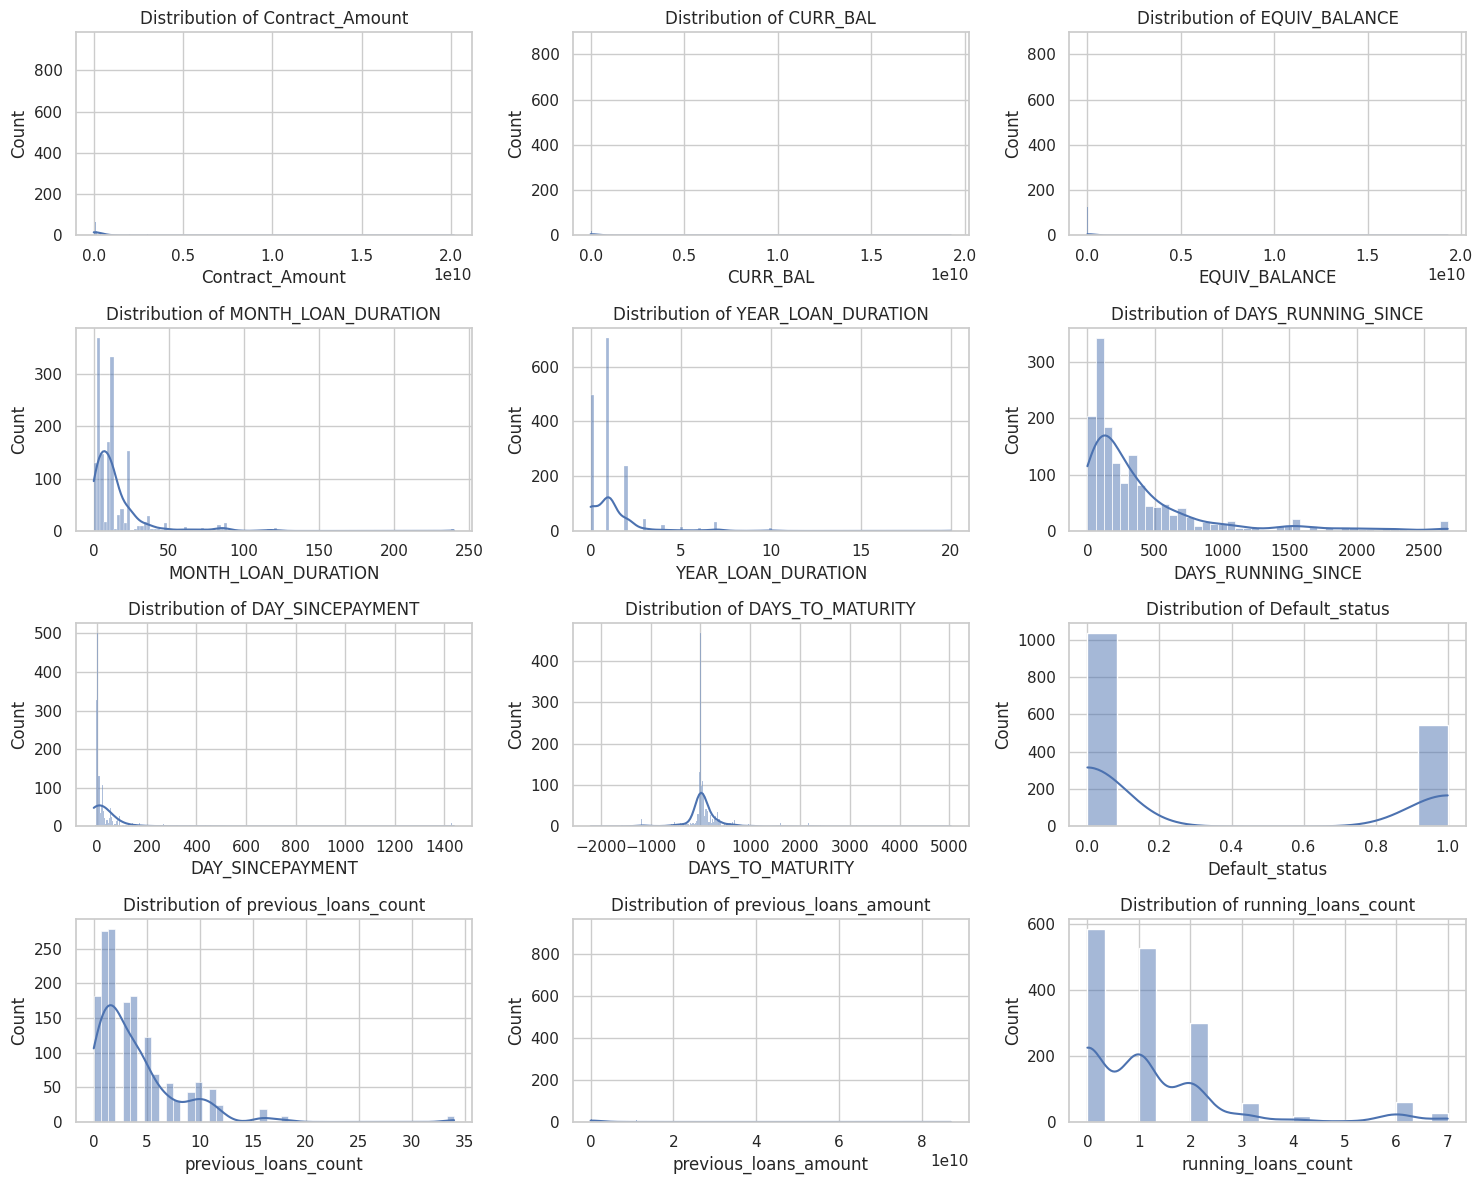

In [8]:
# First, select relevant numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms for numerical features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:12]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Exploratory Data Analysis: Feature Distributions

This grid of distribution plots provides an overview of key features in the loan dataset. Below are key observations:

####  Loan & Financial Metrics
- **Contract_Amount, CURR_BAL, EQUIV_BALANCE, previous_loans_amount**:
  - Highly **right-skewed** distributions.
  - Most values are concentrated near zero, with a few extremely large values (possible **outliers**).
  
####  Duration & Timeline Features
- **MONTH_LOAN_DURATION, YEAR_LOAN_DURATION**:
  - Most loans are **short-term**, with a sharp drop in frequency after ~30 months or 2 years.
  
- **DAYS_RUNNING_SINCE, DAY_SINCEPAYMENT, DAYS_TO_MATURITY**:
  - Right-skewed with long tails — common in time-based features.
  - Some extreme values may indicate **delinquent or very old loans**.

####  Loan History
- **previous_loans_count, running_loans_count**:
  - Majority of borrowers have **fewer than 5 loans**.
  - A small number have unusually high counts (consider checking for duplicates or edge cases).

####  Default Status
- **Default_status**:
  - As seen earlier, **Class 0 (No Default)** is more frequent than **Class 1 (Default)**.
  - This confirms a **moderate class imbalance**, which may require mitigation in modeling.

These patterns will help in:

*   Deciding whether to apply log transformation or scaling.
*   Understanding borrower behavior, especially for outliers.



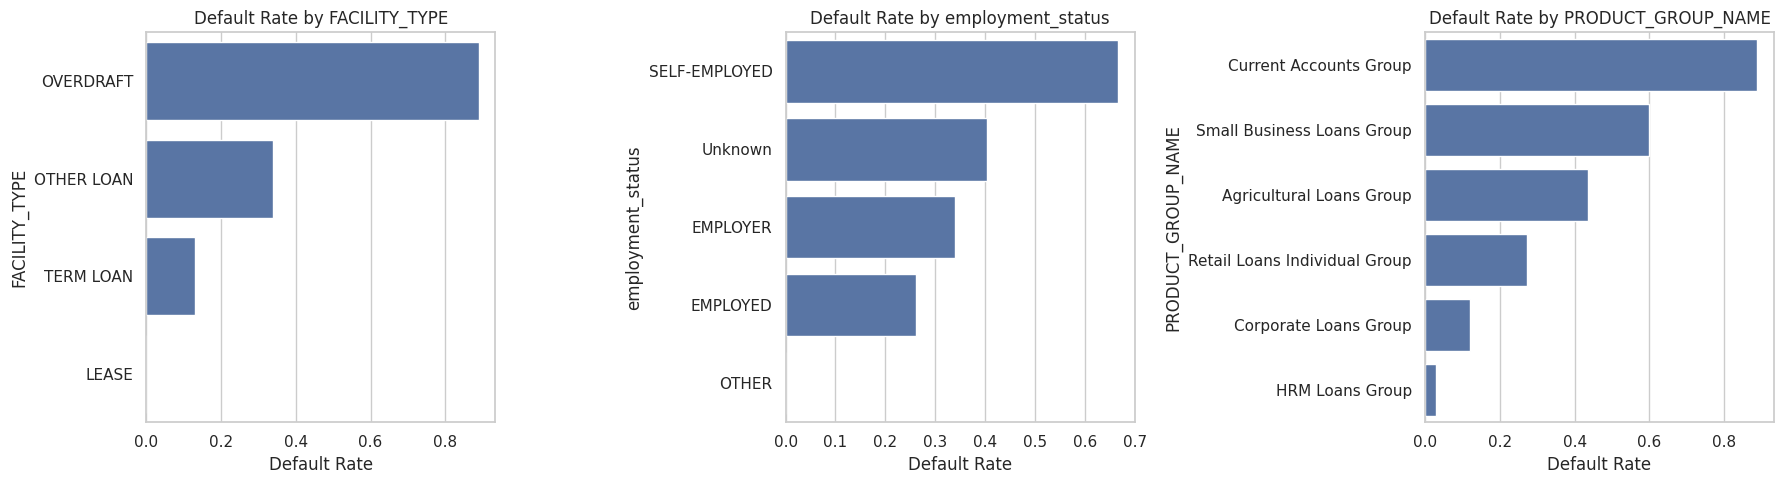

In [9]:
# Define key categorical variables to evaluate against default rate
categorical_vars = ['FACILITY_TYPE', 'employment_status', 'PRODUCT_GROUP_NAME']

# Set up plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.flatten()

# Plot default rate for each categorical variable
for i, var in enumerate(categorical_vars):
    default_rates = df.groupby(var)['Default_status'].mean().sort_values(ascending=False)
    sns.barplot(x=default_rates.values, y=default_rates.index, ax=axes[i])
    axes[i].set_title(f'Default Rate by {var}')
    axes[i].set_xlabel('Default Rate')

plt.tight_layout()
plt.show()

###  Default Rate Analysis by Key Categorical Variables

The bar plots visualize how loan default rates vary across different borrower and product characteristics:

---

####  **Default Rate by FACILITY_TYPE**
- **Overdrafts** have the **highest default rate (~0.9)** — a clear risk flag.
- **Other Loans** show moderate default (~0.35).
- **Term Loans** and **Leases** have **significantly lower risk**, suggesting better borrower discipline or screening.

---

####  **Default Rate by Employment Status**
- **Self-employed individuals** have the **highest default rate (~0.65)**.
- Borrowers with **unknown** or **employer** status follow with moderate risk.
- **Salaried employees (EMPLOYED)** show **lower default rates**, possibly due to stable income.
- Employment type is a strong signal — could be used for segmentation or risk-based pricing.

---

####  **Default Rate by PRODUCT_GROUP_NAME**
- **Current Accounts Group** shows an **alarmingly high default rate (~0.85)** — needs attention.
- **Small Business Loans** and **Agricultural Loans** also show elevated risk.
- **Corporate Loans** and **HRM Loans** demonstrate **low default rates**, indicating stronger creditworthiness or better monitoring.

---

###  Implications for Risk Strategy:
- Incorporate **facility type**, **employment status**, and **product group** as key features in your credit risk model.
- Consider **tightening approval** or **raising interest margins** for overdrafts, self-employed applicants, and current account-linked products.
- Use these insights for **early warning signals**, customer segmentation, and policy rule adjustments.


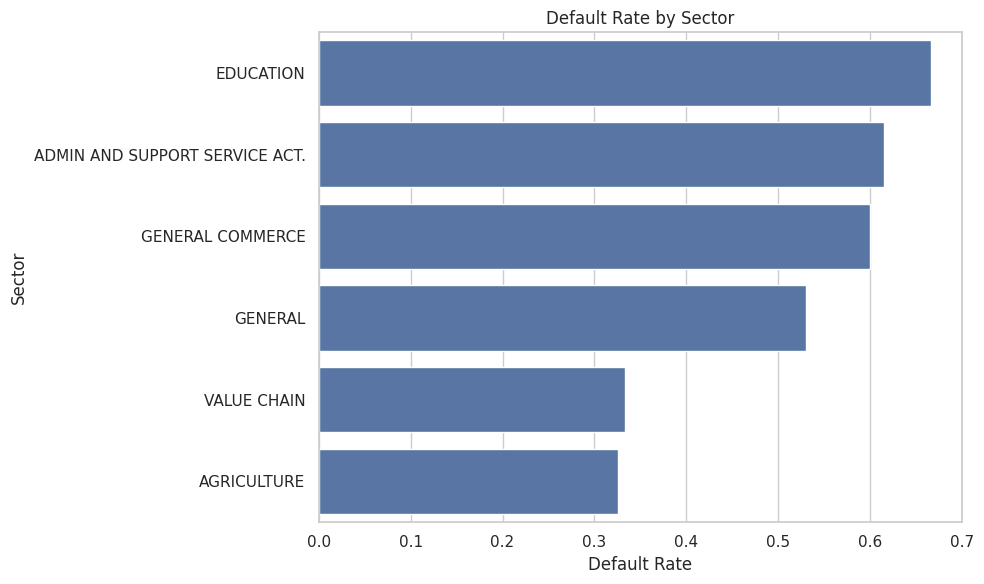

In [10]:
# Analysing default rate by 'sector'
plt.figure(figsize=(10, 6))
sector_default_rate = df.groupby('sector')['Default_status'].mean().sort_values(ascending=False)
sns.barplot(x=sector_default_rate.values, y=sector_default_rate.index)
plt.title("Default Rate by Sector")
plt.xlabel("Default Rate")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


###  Default Rate Analysis by Sector

This plot breaks down loan default rates across various economic sectors:

####  High-Risk Sectors
- **Education** tops the list with the **highest default rate (~0.67)** — signaling potentially unstable income or under-collateralized lending.
- **Admin & Support Services** and **General Commerce** follow closely (~0.60), showing significant credit risk exposure.

####  Medium-Risk Sector
- **General** sector has a moderate default rate (~0.53), suggesting it’s a mixed bag with both high and low-risk borrowers.

####  Lower-Risk Sectors
- **Value Chain** and **Agriculture** show **comparatively lower default rates (~0.32–0.34)**, indicating better repayment discipline or more secure lending structures.

---

###  Strategic Takeaways:
- Prioritize **enhanced screening** and **loan restructuring options** for high-risk sectors like **Education** and **Admin Services**.
- Consider **sector-specific risk modeling** to tailor credit policies and improve portfolio performance.
- Use these insights for **sector-based segmentation**, early warning systems, and loan pricing strategy.


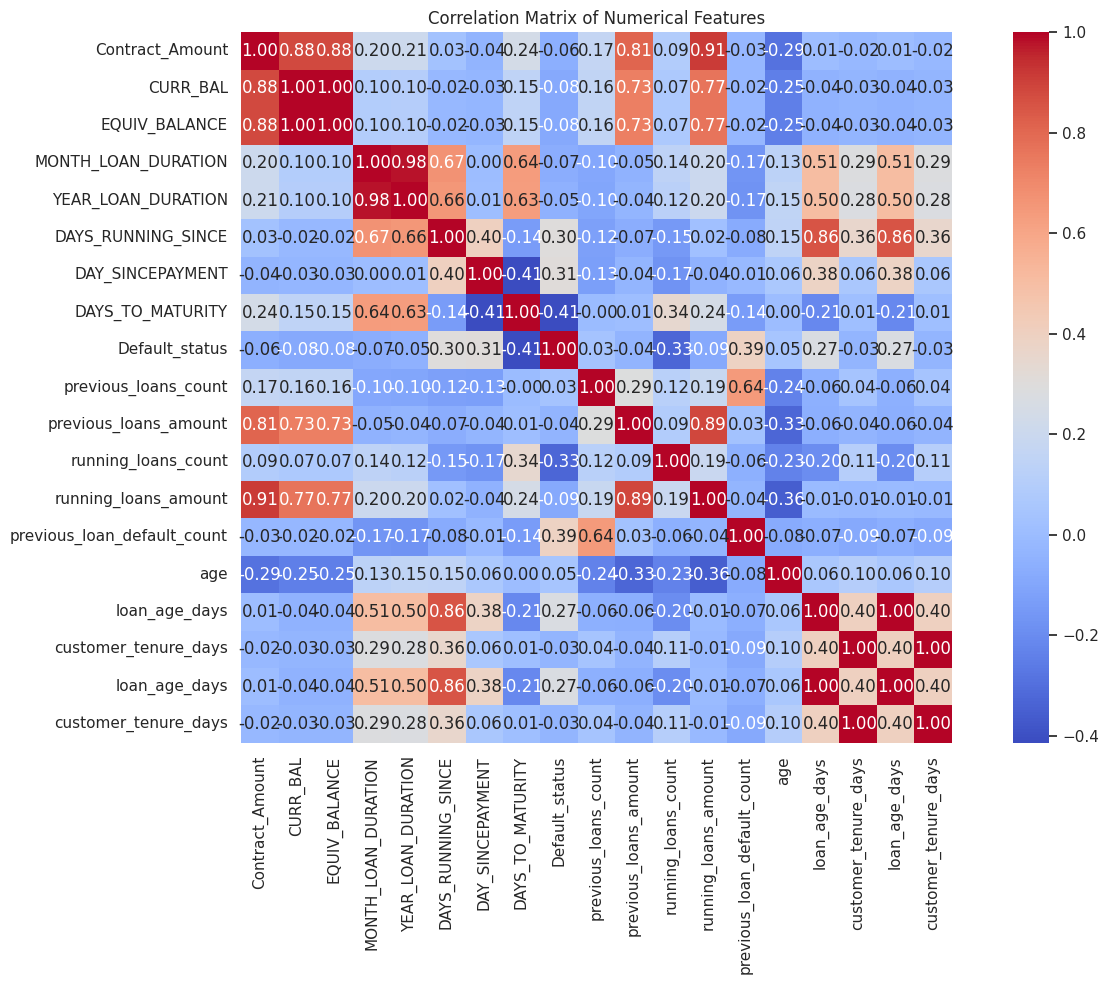

In [11]:
# Computing correlation matrix for numeric features
corr_matrix = df[numeric_cols + ['loan_age_days', 'customer_tenure_days']].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


###  Correlation Matrix Summary: Numerical Features

This heatmap reveals relationships between numerical features in the dataset. Here's a breakdown of key observations:

---

####  Strong Positive Correlations
- **Contract_Amount, CURR_BAL, and EQUIV_BALANCE** are **highly correlated (~0.88–0.91)**.
  - Indicates these represent related financial quantities — might be redundant in some models.
- **MONTH_LOAN_DURATION ↔ YEAR_LOAN_DURATION (0.98)** — as expected, they’re essentially scaled versions of the same info.
- **previous_loans_amount ↔ Contract_Amount (0.81)** and **running_loans_amount ↔ Contract_Amount (0.91)** — loan size is a consistent driver.
- **loan_age_days ↔ loan_age (1.00)** — these are duplicates and should be collapsed.

---

####  Moderate Correlations with Default Status
- **DAYS_TO_MATURITY** shows the **strongest correlation with default status (0.41)** — longer maturity may relate to higher risk.
- **DAYS_RUNNING_SINCE** (0.30) and **MONTH_LOAN_DURATION** (0.30) also show moderate associations.
- **Most other features show weak or negligible correlation** with `Default_status`, suggesting nonlinear or interaction effects may be at play.

---

####  Negative Correlations
- **Age** is **negatively correlated** with `Contract_Amount (-0.29)` and `Default_status (-0.11)` — older borrowers tend to borrow less and default less.
- **loan_age** and `DAY_SINCEPAYMENT` have mild negative relationships with risk variables.

---

###  Modeling Implications
- Watch for **multicollinearity** — use dimensionality reduction or drop highly correlated duplicates (e.g. `loan_age_days` vs `loan_age`).
- Consider **non-linear modeling** techniques or feature engineering since direct correlations with `Default_status` are weak.
- Variables like `DAYS_TO_MATURITY`, `loan_age`, and `age` may be more predictive when combined with categorical indicators.


In [14]:
# Identifying categorical features to encode (excluding target and already numeric)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Default_status_kind')  # Redundant with Default_status
categorical_cols.remove('ARR_STATUS')
categorical_cols.remove('LINE_DESC')  # Very granular text — can be dropped or grouped later

# Applying label encoding for simplicity (can switch to one-hot if needed later)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Dropping redundant columns
df.drop(columns=['Default_status_kind', 'ARR_STATUS', 'LINE_DESC'], inplace=True)

# Preview encoded data
df_encoded_preview = df.head()
df_encoded_preview


,sector,PRODUCT_GROUP_NAME,FACILITY_TYPE,Contract_Amount,CURR_BAL,EQUIV_BALANCE,CONTRACT_MAT_DATE,report_date,PayinAccount_Last_LOD_Date,INTEREST_RATE,...,Default_status,previous_loans_count,previous_loans_amount,running_loans_count,running_loans_amount,previous_loan_default_count,employment_status,age,loan_age_days,customer_tenure_days
0,1,1,3,625280.13,121776.05,121776.05,2020-06-24,2023-05-05,2020-02-07,0,...,1,4,1165280.13,0,0.0,1,0,33.0,2591,2101
1,1,1,3,625280.13,121776.05,121776.05,2020-06-24,2023-05-05,2020-02-07,0,...,1,4,1165280.13,0,0.0,1,0,33.0,2591,3516
2,1,0,1,18012.59,4.20,4.20,2017-08-26,2021-05-31,2019-06-28,0,...,1,2,36691.40,0,0.0,2,4,NaN,3048,3265
3,1,0,1,5176227.76,1975372.41,1975372.41,2018-02-28,2021-05-31,2017-07-19,0,...,1,1,5176227.76,0,0.0,1,4,NaN,3042,3327
4,1,0,1,5176227.76,1975372.41,1975372.41,2018-02-28,2021-05-31,2017-07-19,0,...,1,1,5176227.76,0,0.0,1,4,NaN,3042,3043


In [16]:
# Save the fully encoded and model-ready DataFrame to a new Excel file
encoded_path = "/content/drive/MyDrive/Sterling Bank Assessment/encoded_model_ready_loan_data.xlsx"
df.to_excel(encoded_path, index=False)

encoded_path

'/content/drive/MyDrive/Sterling Bank Assessment/encoded_model_ready_loan_data.xlsx'